In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('../../georef-germany-kreis/georef-germany-kreis-millesime.shp')
index = pd.read_csv('../../data/index.csv')

In [4]:
data = pd.read_csv('../../data/cluster3.csv')

In [7]:
def fix_ags5(x):
    """Function to fix the format of ag5 """
    if len(str(x))==4:
        return '0'+str(x)
    else:
        return str(x)

In [8]:
try:
    merged = pd.merge(data, gdf, left_on='ags5', right_on='krs_code')
except ValueError:
    data['ags5_fix'] = data['ags5'].apply(fix_ags5)
    merged = pd.merge(data, gdf, left_on='ags5_fix', right_on='krs_code')

In [9]:
# get the geospatial data 
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
merged['longitude'] = merged['coords'].str[0]
merged['latitude'] = merged['coords'].str[1]

# convert to geodata
merged = gpd.GeoDataFrame(merged)

In [12]:
data_col = 'fake'

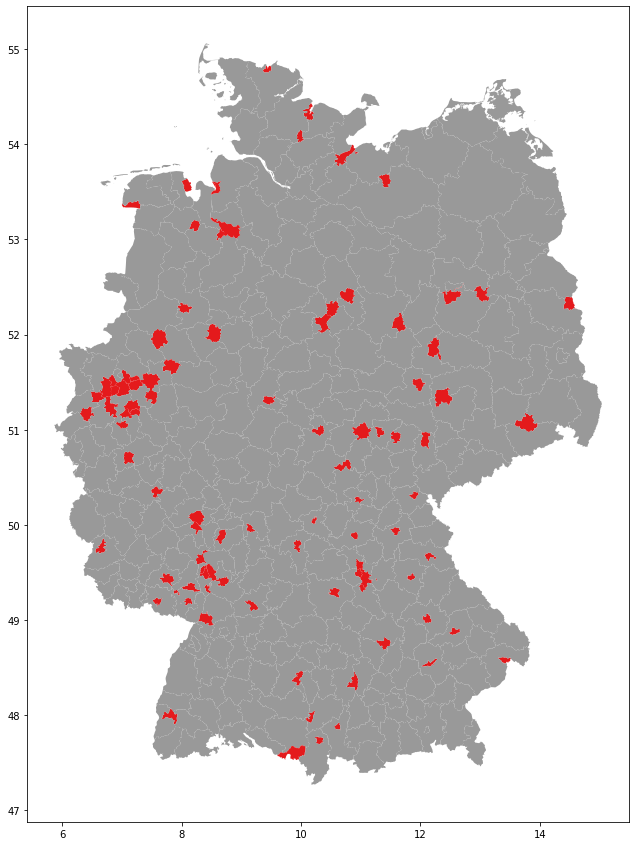

In [18]:
fig, ax = plt.subplots(figsize=(25,15))
merged.plot(column=data_col, #scheme="NaturalBreaks",
            #scheme='UserDefined', classification_kwds={'bins':clusters},
            ax=ax, cmap='Set1_r', categorical=True)
# ax.set_title(f'{data_col} in Germany by County', fontsize=15)
plt.savefig('../../img/cluster3.png')